In [1]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
%matplotlib inline
sc.settings.verbosity = 0




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "supp"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


# scRNA

In [9]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.nohealthy'
adata_5k=sc.read_h5ad(PATH)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"].copy()
#adata=adata[adata.obs["tech"]!="xenium"].copy()
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST





#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
import gc
gc.collect()

7952

In [18]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna'

adata=sc.read_h5ad(PATH)


In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



In [ ]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [ ]:
# adata.obs["Site_status"].unique()

['Non-lesional', 'Lesional', 'PostRx', 'Healthy', 'PostRx-Lesional Dupilumab (16 wk)', 'PostRx-Lesional Dupilumab (1 yr)']
Categories (6, object): ['Healthy', 'Lesional', 'Non-lesional', 'PostRx', 'PostRx-Lesional Dupilumab (1 yr)', 'PostRx-Lesional Dupilumab (16 wk)']

In [ ]:
KEEP = [#"Week 12", 
       "Nonlesional",
    "Non-lesional",
    "Never lesional"
     #  "Lesional"
]
adata=adata[adata.obs["Site_status"].isin(KEEP)]
adata=adata[(adata.obs["lvl5_annotation"].str.startswith("Peri"))|
            (adata.obs["lvl5_annotation"].str.startswith("F3:"))|
            (adata.obs["lvl5_annotation"].str.startswith("F2/3"))
           
           
           
           ]
adata.shape

In [ ]:
KEEP = [#"Week 12", 
       "Non-lesional",
     #  "Lesional"
]
adata_5k=adata_5k[adata_5k.obs["Site_status"].isin(KEEP)]
adata_5k=adata_5k[(adata_5k.obs["lvl5_annotation"].str.startswith("Peri"))|
            (adata_5k.obs["lvl5_annotation"].str.startswith("F3:"))|
            (adata_5k.obs["lvl5_annotation"].str.startswith("F2/3"))
           
           
           
           ]
adata_5k.shape

(43317, 4993)

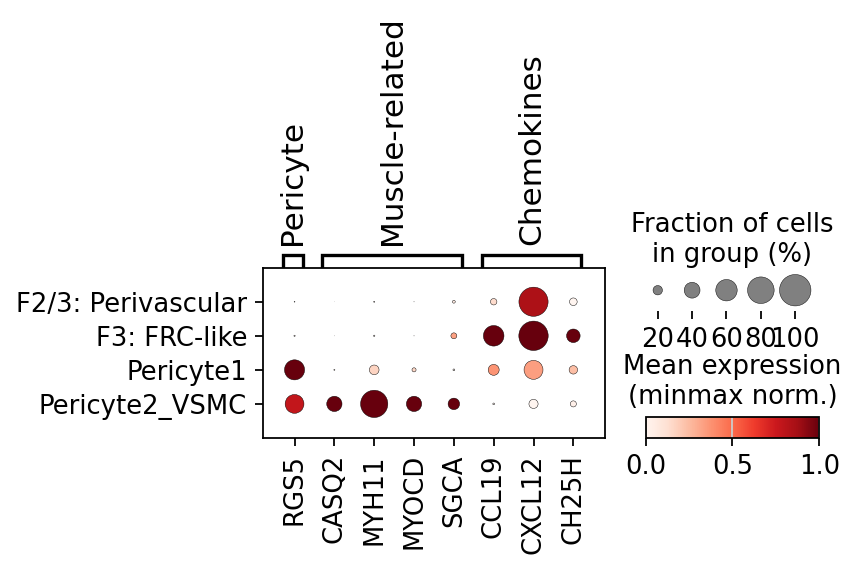

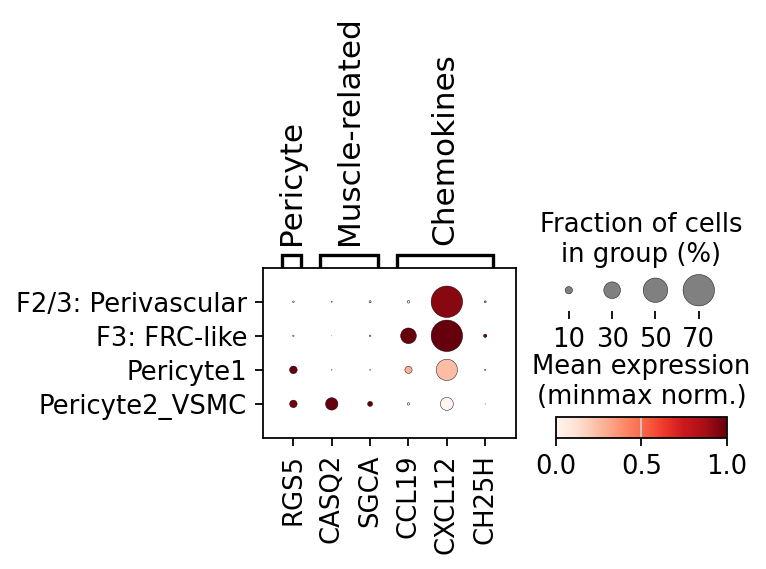

In [ ]:
vasc_markers_new = {"Pericyte": [  "RGS5",],
                    #"Peri1": [ "CCL19", "ANPEP", "PTGES", "WNT6", "NGFR", "ADAMTS2", "COL23A1", "TMEM119", "ADCYAP1R1"],
                    "Muscle-related": ["CASQ2","MYH11",  "MYOCD",'SGCA', 
                             ],
                    "Chemokines": ["CCL19", "CXCL12", "CH25H"],
                       

                   }
CATEGORY="lvl5_annotation"
sc.pl.dotplot(adata, 
              vasc_markers_new,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                            colorbar_title="Mean expression\n(minmax norm.)",

             save="pericyte_chemokine_plot_scrna.pdf"
             )

sc.pl.dotplot(adata_5k, 
              remove_markers(vasc_markers_new),
              groupby=CATEGORY,
              dendrogram=False, 
            dot_max=0.7,
                standard_scale="var",
              colorbar_title="Mean expression\n(minmax norm.)",
               save="pericyte_chemokine_plot_xenium.pdf")



# try:
#     sc.pl.dotplot(
#     adata_i,
#     vasc_markers_new,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#     #swap_axes=True
# ) 
# except:
#     1